In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [2]:
# Configurando o fundo branco padrão no matplotlib
plt.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

image.shape: torch.Size([1, 28, 28])
Label 5


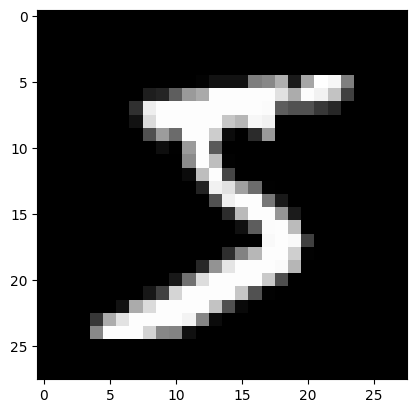

In [4]:
image, label = dataset[0]
print("image.shape:", image.shape)
plt.imshow(image.permute(1, 2, 0), cmap="gray")
print("Label", label)

In [5]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
VAL_SIZE = 10000
train_size = len(dataset) - VAL_SIZE

train_ds, val_ds = random_split(dataset, [train_size, VAL_SIZE])
len(train_ds), len(val_ds)

(50000, 10000)

In [7]:
BATCH_SIZE = 128

In [8]:
train_loader = DataLoader(
    train_ds, BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True
)

val_loader = DataLoader(val_ds, BATCH_SIZE * 2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


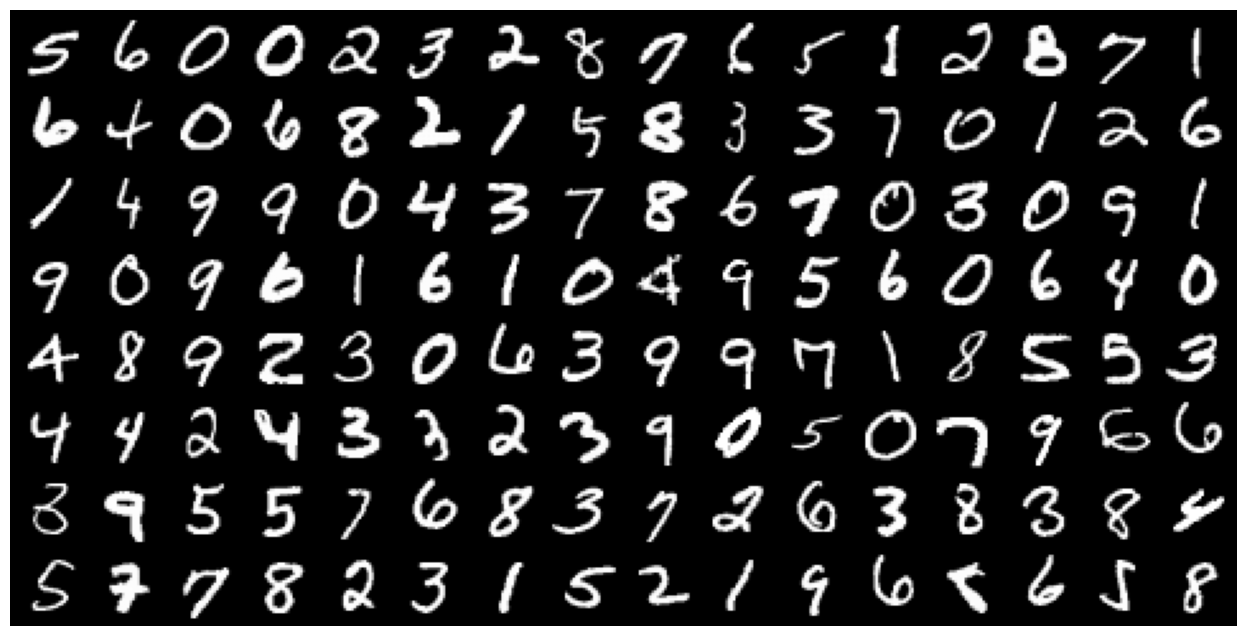

In [9]:
for images, _ in train_loader:
    print("images.shape:", images.shape)
    plt.figure(figsize=(16, 8))
    plt.axis("off")
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

## Camadas ocultas, funções de ativação e não-lineariedade

Criaremos uma rede neural com duas camadas: Uma oculta e outra de saída. Também usaremos uma função de ativação entre elas.

Primeiro, criamos um lote de tensores de entrada. Planificaremos o tensor de imagem `[1x28x28]` em `[1x784]` para passarmos para um objeto `nn.Linear`

In [10]:
for images, labels in train_loader:
    print("images.shape:", images.shape)
    inputs = images.reshape(-1, 784)
    print("inputs.shape:", inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Agora criamos o objeto `nn.Linear` que servirá como nossa camada oculta. Configuraremos o tamanho da saída da camada oculta para 32. Esse número pode descrescer ou crescer para mudar a capacidade de aprendizado do modelo.

In [23]:
input_size = inputs.shape[-1]
HIDDEN_SIZE = 32

In [24]:
layer1 = nn.Linear(input_size, HIDDEN_SIZE)

Agora calculamos as saídas intermediárias para os lotes de imagens passando `inputs` através de `layer1`

In [25]:
inputs.shape

torch.Size([128, 784])

In [26]:
layer1_outputs = layer1(inputs)
print("layer1_outputs.shape:", layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


Os vetores de tamanho `784` da imagem são transformados em vetores de saídas intermediárias com tamanho `32` performando a multiplicação da matriz `inputs` com a matriz `layer1` transposta e adicionando o bias.

In [28]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [35]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [36]:
F.relu(torch.tensor([[1, -1, 0], [-0.1, 0.2, 0.3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.3000]])

In [37]:
relu_outputs = F.relu(layer1_outputs)
print("min(layer1_outputs):", torch.min(layer1_outputs).item())
print("min(relu_outputs):", torch.min(relu_outputs).item())

min(layer1_outputs): -0.9951795339584351
min(relu_outputs): 0.0


Agora que aplicamos uma função de ativação não linear, `relu_outputs` e `inputs` não tem relação linear. Nos referimos a `ReLU` como função de ativação porque para cada entrada, algumas saídas serão ativadas e outras não.

In [39]:
torch.allclose(layer1_outputs, relu_outputs, 1e-0)

False

In [40]:
OUTPUT_SIZE = 10
layer2 = nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)

In [41]:
layer2_outputs = layer2(relu_outputs)
print("layer2_outputs.shape:", layer2_outputs.shape)

layer2_outputs.shape: torch.Size([128, 10])
